### Predicting the Price of Microsoft Stock

This class will look to build an ARIMA(p, d, q) model from a history of Microsoft's stock price.

##### Step 1:  Load in the data set

In [9]:
import pandas as pd
import numpy as np
data = pd.read_csv('../data/msft.csv', index_col='Date', parse_dates=True)

##### Step 2:  Turn It Into A Stationary Time Series (You can do the same process that was used before)

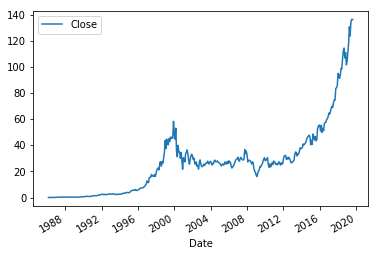

In [7]:
data.plot();

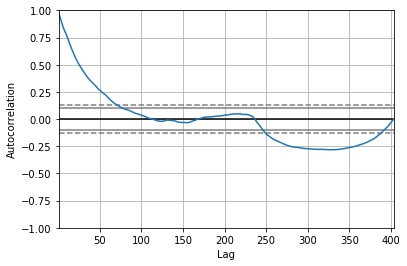

In [16]:
autocorrelation_plot(data.Close);

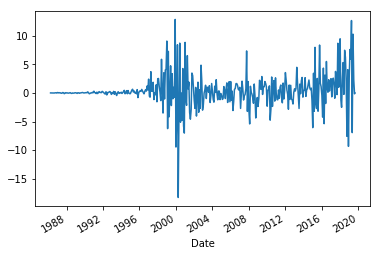

In [18]:
data.Close.diff().plot();

In [12]:
data['LogPrice'] = np.log(data.Close)
data.LogPrice.head()

Date
1986-03-01   -2.348776
1986-04-01   -2.189444
1986-05-01   -2.107611
1986-06-01   -2.237069
1986-07-01   -2.313060
Name: LogPrice, dtype: float64

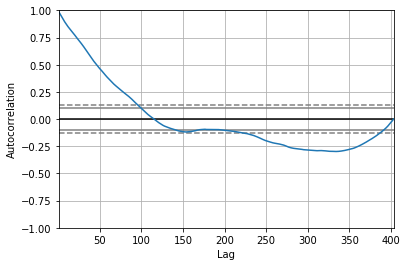

In [14]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data.LogPrice);

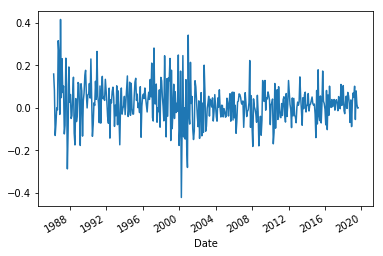

In [20]:
data.LogPrice.diff().plot();

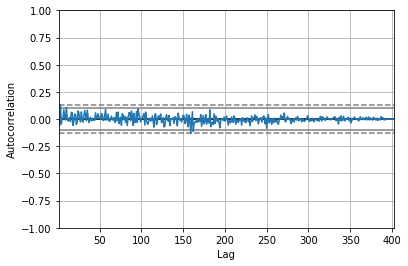

In [22]:
autocorrelation_plot(data.LogPrice.diff()[1:]);

##### Step 3:  Plot the new Time Series, as well as the autocorrelation_plot in pandas

##### Step 4:  Using statsmodels, grab the acf and pacf plots to get an idea of what your p and q terms will be

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

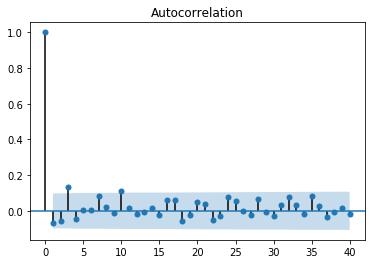

In [27]:
x = plot_acf(data.LogPrice.diff()[1:], lags=40)

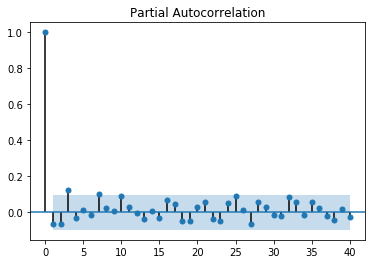

In [28]:
y = plot_pacf(data.LogPrice.diff()[1:], lags=40)

##### Step 5: Fit the Model

In [64]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data.LogPrice, order=(2, 1, 1))
results = model.fit()

C:\Users\Jonat\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Jonat\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


##### Step 6:  Pull Its Summary

In [65]:
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.LogPrice   No. Observations:                  402
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 381.416
Method:                       css-mle   S.D. of innovations              0.094
Date:                Mon, 26 Aug 2019   AIC                           -752.831
Time:                        20:19:16   BIC                           -732.849
Sample:                             1   HQIC                          -744.920
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0180      0.004      4.309      0.000       0.010       0.026
ar.L1.D.LogPrice    -0.7591      0.148     -5.114      0.000      -1.050      -0.468
ar.L2.D.LogPrice    -0.1394 

##### Step 7:  What Are the Final Parameters of Your Model?

Write them down on your nameplate!

##### Step 8:  What Is The Predicted Stock Price in 3 Months Time? (Convert the price back to dollars)

In [49]:
results.forecast(steps=3)

(array([4.92822438, 4.95132403, 4.96594565]),
 array([0.0936865 , 0.12849625, 0.15096737]),
 array([[4.74460221, 5.11184655],
        [4.69947602, 5.20317205],
        [4.67005503, 5.26183626]]))

In [50]:
three_months_price = results.forecast(steps=3)[0][2]

In [51]:
np.exp(three_months_price)

143.44413349346152

Write down your results on your nameplate

##### Step 9:  What Is The 95% Confidence Interval?

In [55]:
lower_bound, upper_bound = results.forecast(steps=3)[2][2]

In [57]:
print(np.exp(lower_bound), np.exp(upper_bound))

106.70361443615427 192.83526188329557


Write down your results on your nameplate.